In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os

from skluc.main.utils import logger

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.expand_frame_repr', False)

2019-01-14 08:17:52,216 [31463] DEBUG    matplotlib.backends: backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
def build_df(dirname, filename):
    filepath = os.path.join(dirname, filename)
    df = pd.read_csv(filepath)
    df = df.apply(pd.to_numeric, errors="ignore")
    df = df.drop_duplicates()
    col_to_delete = ['--chi-square-PD-kernel', '--chi-square-kernel',
       '--cifar10', '--cifar100', '--exp-chi-square-kernel',
       '--intercept-constant', '--laplacian-kernel', '--linear-kernel',
       '--mnist', '--quiet', '--rbf-kernel',
       '--sigmoid-kernel',  '--svhn',
       '--tensorboard', '--validation-size', "--out-dim"
       , 'deepstrom','dense', 
                     "--non-linear", "--non-linearity", "--num-epoch", "--seed",
                     "--train-size", "--second-layer-size", "activation_function",
                     "deepstrom_activation", "--real-nystrom"
            ]
    for c in col_to_delete:
        df = df.drop([c], axis=1)
    return df


In [4]:
DIRNAME = "/home/luc/PycharmProjects/deepstrom_network/results/2019-01/classif_end_to_end_mnist_grid_search/"
FILENAME = "gathered_results.csv"
df = build_df(DIRNAME, FILENAME)

In [5]:
df

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time  train_time training_time   val_acc  val_eval_time  file_timestamp
0             128        0.5    None           0.0100            True         128              False   mnist  chi2_cpd  deepstrom  0.869692        0.367967  115.701712          None  0.854167       0.449956      1547055729
1             128        0.5     0.5           0.0001            True         128               True   mnist       rbf  deepstrom  0.908854        0.295003  117.021367          None  0.896534       0.395085      1547058224
2              64        0.5    None           0.0001           False         128               True   mnist  chi2_cpd  deepstrom  0.495593        0.531018  137.251834          None  0.479768       0.619099      1547055829
3             256        0.5     0.1           0.0010            True         128               True   mnist       rbf  deepstrom  0.401542        0.151858   94.097611          None  0.397436       0.277515      1547058253
4              64        1.0    0.01           0.0001            True         128               True   mnist       rbf  deepstrom  0.319111        0.543860  145.847812          None  0.314503       0.639132      1547058224
5              64        0.5    0.05           0.0100            True         128              False   mnist       rbf  deepstrom  0.097857        0.486118  130.650886          None  0.100060       0.568647      1547060334
6             256        0.5    None           0.0001           False         128               True   mnist  chi2_cpd  deepstrom  0.089143        0.272525  109.183829          None  0.088942       0.358269      1547057962
7             256        1.0    None           0.0100            True         128               True   mnist  chi2_cpd  deepstrom  0.741286        0.282013  113.660781          None  0.740485       0.359353      1547055717
8             256        0.5     0.5           0.0001            True         128              False   mnist       rbf  deepstrom  0.804988        0.148552   91.061302          None  0.796775       0.263268      1547060711
9              64        1.0     0.1           0.0100           False         128               True   mnist       rbf  deepstrom  0.898037        0.799274  216.205434          None  0.889924       0.927708      1547061301
10             64        1.0    None           0.0100            True         128               True   mnist  chi2_cpd  deepstrom  0.366386        0.862664  223.412678          None  0.364083       1.012099      1547053169
11            128        1.0     0.5           0.0100            True         128               True   mnist       rbf  deepstrom  0.428886        0.272979  107.953898          None  0.426983       0.368845      1547058253
12             64        0.5     0.1           0.0100            True         128              False   mnist       rbf  deepstrom  0.246595        0.487123  131.671694          None  0.248297       0.571644      1547060334
13            128        1.0    None           0.0001           False         128               True   mnist    linear  deepstrom  0.113281        0.435418  175.796766          None  0.115284       0.546366      1547057468
14            256        1.0    None           0.0010            True         128              False   mnist  chi2_cpd  deepstrom  0.725861        0.258355  100.221721          None  0.723958       0.348506      1547055829
15            128        1.0    0.01           0.0001           False         128               True   mnist       rbf  deepstrom  0.873397        0.264578  104.094707          None  0.866987       0.335872      1547062472
16             64        0.5     0.1           0.0010           False         128              False   mnist       rbf  deepstrom  0.920272        0.502383  136.660974          None  0.915264       0.588033      15

In [6]:
def get_sorted_acc_for_dataset(df_, name):
    df_dataset = df_[df_["dataset"] == name]
    df_dataset = df_dataset.sort_values(by="val_acc", ascending=False)
    return df_dataset

In [7]:
sorted_ = get_sorted_acc_for_dataset(df, "mnist")
for k in ["rbf", "linear", "chi2_cpd"]:
    sorted_k = sorted_[sorted_["kernel"] == k]
    print(k)
    display(sorted_k)

rbf


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset kernel    network  test_acc  test_eval_time  train_time training_time   val_acc  val_eval_time  file_timestamp
212           256        0.5     0.1           0.0100           False         128              False   mnist    rbf  deepstrom  0.958333        0.178920  107.313868          None  0.956030       0.304398      1547063614
240           256        1.0     0.1           0.0100           False         128              False   mnist    rbf  deepstrom  0.953025        0.144346   91.303993          None  0.954227       0.254376      1547064575
261           256        0.5    0.05           0.0010           False         128               True   mnist    rbf  deepstrom  0.956430        0.146197   90.102996          None  0.951923       0.253630      1547062667
324            64        1.0    0.05           0.0100           False         128              False   mnist    rbf  deepstrom  0.947917        0.535331  138.946479          None  0.948718       0.609455      1547062947
126           256        0.5    0.01           0.0100           False         128              False   mnist    rbf  deepstrom  0.952724        0.177588  104.802711          None  0.948217       0.302169      1547063614
193           128        1.0     0.1           0.0100           False         128              False   mnist    rbf  deepstrom  0.954026        0.272720  104.892497          None  0.946114       0.356428      1547063131
363           256        0.5    0.05           0.0100           False         128               True   mnist    rbf  deepstrom  0.947015        0.153159   93.718976          None  0.941006       0.265331      1547062472
232           128        0.5     0.5           0.0010           False         128              False   mnist    rbf  deepstrom  0.946715        0.278868  105.489818          None  0.940705       0.354677      1547063131
267           256        0.5     0.5           0.0100           False         128               True   mnist    rbf  deepstrom  0.946514        0.151462   92.736407          None  0.939804       0.267188      1547062472
389            64        0.5     0.1           0.0100           False         128              False   mnist    rbf  deepstrom  0.946514        0.512244  138.871357          None  0.938902       0.600176      1547062947
225           256        1.0     0.5           0.0010           False         128               True   mnist    rbf  deepstrom  0.942107        0.146184   91.428747          None  0.937400       0.252020      1547062667
50            128        1.0    0.05           0.0100           False         128              False   mnist    rbf  deepstrom  0.946114        0.275218  104.232919          None  0.936899       0.356588      1547063131
77            128        0.5    0.05           0.0100           False         128              False   mnist    rbf  deepstrom  0.941206        0.270720  104.940181          None  0.936398       0.353158      1547063131
205           256        0.5     0.1           0.0100           False         128               True   mnist    rbf  deepstrom  0.943309        0.153298   92.833984          None  0.935196       0.268664      1547062472
342           256        0.5    0.05           0.0100           False         128              False   mnist    rbf  deepstrom  0.942608        0.175973  103.429837          None  0.934796       0.294334      1547063614
88            256        0.5     0.1           0.0010           False         128               True   mnist    rbf  deepstrom  0.939804        0.145946   93.533242          None  0.934395       0.256346      1547062667
81            128        0.5     0.1           0.0010           False         128              False   mnist    rbf  deepstrom  0.942909        0.268595  105.541201          None  0.934195       0.354916      1547063131
197           128        0.5     0.1         

linear


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset  kernel    network  test_acc  test_eval_time  train_time training_time   val_acc  val_eval_time  file_timestamp
356           256        0.5    None           0.0100           False         128              False   mnist  linear  deepstrom  0.967548        0.149606   93.718155          None  0.964143       0.247741      1547058165
255            64        0.5    None           0.0100           False         128              False   mnist  linear  deepstrom  0.948317        0.502425  134.916263          None  0.945212       0.576759      1547057962
33             64        0.5    None           0.0100            True         128              False   mnist  linear  deepstrom  0.948718        0.524705  145.729628          None  0.941707       0.622632      1547055717
402           128        0.5    None           0.0100            True         128              False   mnist  linear  deepstrom  0.938301        0.272074  104.530825          None  0.932692       0.353971      1547055729
408           128        0.5    None           0.0010           False         128              False   mnist  linear  deepstrom  0.934595        0.263031  103.313768          None  0.922676       0.330051      1547058165
184            64        1.0    None           0.0010           False         128              False   mnist  linear  deepstrom  0.933193        0.492204  134.258977          None  0.922376       0.565232      1547057962
188           128        1.0    None           0.0010            True         128              False   mnist  linear  deepstrom  0.915565        0.278989  107.425416          None  0.917969       0.353591      1547055729
37             64        1.0    None           0.0100            True         128              False   mnist  linear  deepstrom  0.913762        0.472849  130.662224          None  0.912660       0.554975      1547055729
405            64        0.5    None           0.0010           False         128              False   mnist  linear  deepstrom  0.908754        0.490040  135.569063          None  0.908053       0.577266      1547057962
161            64        1.0    None           0.0010            True         128              False   mnist  linear  deepstrom  0.907051        0.477394  128.452606          None  0.904547       0.559476      1547055729
268           128        1.0    None           0.0100            True         128               True   mnist  linear  deepstrom  0.906751        0.448005  179.881030          None  0.902444       0.574947      1547053169
272            64        1.0    None           0.0001            True         128              False   mnist  linear  deepstrom  0.903946        0.481645  128.226148          None  0.901743       0.561124      1547055729
57             64        0.5    None           0.0001           False         128              False   mnist  linear  deepstrom  0.908954        0.500376  135.171238          None  0.895032       0.573291      1547057962
355           128        1.0    None           0.0100           False         128              False   mnist  linear  deepstrom  0.913662        0.262861  103.126736          None  0.892728       0.331410      1547058165
148            64        1.0    None           0.0001            True         128               True   mnist  linear  deepstrom  0.905549        0.794441  218.815761          None  0.891627       0.916540      1547053169
114            64        0.5    None           0.0001            True         128               True   mnist  linear  deepstrom  0.897436        0.804849  218.942476          None  0.886418       0.929600      1547053169
66            256        1.0    None           0.0100            True         128              False   mnist  linear  deepstrom  0.896134        0.152072   92.789734          None  0.885717       0.254426      1547055829
168           256        1.

chi2_cpd


--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time  train_time training_time   val_acc  val_eval_time  file_timestamp
265            64        0.5    None           0.0100            True         128              False   mnist  chi2_cpd  deepstrom  0.951222        0.621906  157.326300          None  0.945112       0.690635      1547055717
20             64        1.0    None           0.0010           False         128              False   mnist  chi2_cpd  deepstrom  0.929688        0.578572  145.914863          None  0.924780       0.654833      1547057962
273           128        0.5    None           0.0010           False         128              False   mnist  chi2_cpd  deepstrom  0.928285        0.332989  111.525648          None  0.921174       0.401018      1547058165
237           128        0.5    None           0.0010            True         128              False   mnist  chi2_cpd  deepstrom  0.920172        0.356544  115.327395          None  0.920974       0.448458      1547055729
74             64        0.5    None           0.0001            True         128               True   mnist  chi2_cpd  deepstrom  0.924980        0.816844  226.320411          None  0.916867       0.956633      1547053169
46            256        0.5    None           0.0001            True         128               True   mnist  chi2_cpd  deepstrom  0.914163        0.286118  114.472678          None  0.908253       0.383542      1547055717
326            64        0.5    None           0.0001            True         128              False   mnist  chi2_cpd  deepstrom  0.915365        0.572769  143.142551          None  0.906250       0.661130      1547055729
143            64        1.0    None           0.0001            True         128              False   mnist  chi2_cpd  deepstrom  0.912059        0.585811  142.707337          None  0.906150       0.662474      1547055729
285            64        1.0    None           0.0001            True         128               True   mnist  chi2_cpd  deepstrom  0.908854        0.817186  224.744316          None  0.901142       0.948515      1547053169
348           128        0.5    None           0.0001            True         128               True   mnist  chi2_cpd  deepstrom  0.912760        0.505408  188.149143          None  0.901142       0.636079      1547053169
306           256        1.0    None           0.0100            True         128              False   mnist  chi2_cpd  deepstrom  0.899940        0.266079  100.937481          None  0.900841       0.347571      1547055829
416           128        1.0    None           0.0001            True         128               True   mnist  chi2_cpd  deepstrom  0.901943        0.388612  127.541576          None  0.894832       0.467231      1547055717
425           128        1.0    None           0.0001           False         128              False   mnist  chi2_cpd  deepstrom  0.907352        0.332502  110.891058          None  0.892328       0.400311      1547058165
167           128        0.5    None           0.0001            True         128              False   mnist  chi2_cpd  deepstrom  0.894631        0.366439  114.730684          None  0.890325       0.447766      1547055729
359           256        1.0    None           0.0001            True         128               True   mnist  chi2_cpd  deepstrom  0.895032        0.282655  111.942894          None  0.884315       0.358831      1547055717
49             64        0.5    None           0.0010            True         128              False   mnist  chi2_cpd  deepstrom  0.880108        0.620435  157.357007          None  0.876402       0.690517      1547055717
23            128        1.0    None           0.0001            True         128              False   mnist  chi2_cpd  deepstrom  0.882913        0.356410  114.692165          None  0.872796       0.447496      15

In [7]:
get_sorted_acc_for_dataset(df, "mnist")

--batch-size  --dropout --gamma  --learning-rate  --normalize-l2  --nys-size  --tanh-activation dataset    kernel    network  test_acc  test_eval_time  train_time training_time   val_acc  val_eval_time  file_timestamp
356           256        0.5    None           0.0100           False         128              False   mnist    linear  deepstrom  0.967548        0.149606   93.718155          None  0.964143       0.247741      1547058165
212           256        0.5     0.1           0.0100           False         128              False   mnist       rbf  deepstrom  0.958333        0.178920  107.313868          None  0.956030       0.304398      1547063614
240           256        1.0     0.1           0.0100           False         128              False   mnist       rbf  deepstrom  0.953025        0.144346   91.303993          None  0.954227       0.254376      1547064575
261           256        0.5    0.05           0.0010           False         128               True   mnist       rbf  deepstrom  0.956430        0.146197   90.102996          None  0.951923       0.253630      1547062667
324            64        1.0    0.05           0.0100           False         128              False   mnist       rbf  deepstrom  0.947917        0.535331  138.946479          None  0.948718       0.609455      1547062947
126           256        0.5    0.01           0.0100           False         128              False   mnist       rbf  deepstrom  0.952724        0.177588  104.802711          None  0.948217       0.302169      1547063614
193           128        1.0     0.1           0.0100           False         128              False   mnist       rbf  deepstrom  0.954026        0.272720  104.892497          None  0.946114       0.356428      1547063131
255            64        0.5    None           0.0100           False         128              False   mnist    linear  deepstrom  0.948317        0.502425  134.916263          None  0.945212       0.576759      1547057962
265            64        0.5    None           0.0100            True         128              False   mnist  chi2_cpd  deepstrom  0.951222        0.621906  157.326300          None  0.945112       0.690635      1547055717
33             64        0.5    None           0.0100            True         128              False   mnist    linear  deepstrom  0.948718        0.524705  145.729628          None  0.941707       0.622632      1547055717
363           256        0.5    0.05           0.0100           False         128               True   mnist       rbf  deepstrom  0.947015        0.153159   93.718976          None  0.941006       0.265331      1547062472
232           128        0.5     0.5           0.0010           False         128              False   mnist       rbf  deepstrom  0.946715        0.278868  105.489818          None  0.940705       0.354677      1547063131
267           256        0.5     0.5           0.0100           False         128               True   mnist       rbf  deepstrom  0.946514        0.151462   92.736407          None  0.939804       0.267188      1547062472
389            64        0.5     0.1           0.0100           False         128              False   mnist       rbf  deepstrom  0.946514        0.512244  138.871357          None  0.938902       0.600176      1547062947
225           256        1.0     0.5           0.0010           False         128               True   mnist       rbf  deepstrom  0.942107        0.146184   91.428747          None  0.937400       0.252020      1547062667
50            128        1.0    0.05           0.0100           False         128              False   mnist       rbf  deepstrom  0.946114        0.275218  104.232919          None  0.936899       0.356588      1547063131
77            128        0.5    0.05           0.0100           False         128              False   mnist       rbf  deepstrom  0.941206        0.270720  104.940181          None  0.936398       0.353158      15

In [8]:
method_names = set(df["network"].values)
kernel_names = set(df["kernel"].values)
nys_size = set(df["--nys-size"].values)
gamma_values = set(df["--gamma"].values)
gamma_values.remove("None")
datasets = set(df["dataset"].values)

logger.debug("Nystrom possible sizes are: {}".format(nys_size))
logger.debug("Datasets: {}".format(datasets))
logger.debug("Kernel functions are: {}".format(kernel_names))
logger.debug("Compared network types are: {}".format(method_names))

2019-01-10 18:38:47,277 [28247] DEBUG    root: Nystrom possible sizes are: {128}
2019-01-10 18:38:47,278 [28247] DEBUG    root: Datasets: {'mnist'}
2019-01-10 18:38:47,280 [28247] DEBUG    root: Kernel functions are: {'rbf', 'chi2_cpd', 'linear'}
2019-01-10 18:38:47,282 [28247] DEBUG    root: Compared network types are: {'deepstrom'}


In [14]:
nb = 5
data = "mnist"
map_k_arg = {
    "rbf": "-R",
    "chi2_cpd": "-C",
    "linear": "-L"
}
for k_name in kernel_names:
    df_k = df[df["kernel"] == k_name]
    df_k_sorted = get_sorted_acc_for_dataset(df_k, data)
#     best_10 = df_k_sorted[:nb]
#     display(best_10)
    for i in range(nb):
#         print(df_k_sorted["--learning-rate"])
        lr = df_k_sorted["--learning-rate"].iloc[i]
        dropout = df_k_sorted["--dropout"].iloc[i]
        l2 = df_k_sorted["--normalize-l2"].iloc[i]
        tanh = df_k_sorted["--tanh-activation"].iloc[i]
        bsize = df_k_sorted["--batch-size"].iloc[i]
        if k_name == "rbf":
            gam = df_k_sorted["--gamma"].iloc[i]
        else:
            gam = None
        msg = "deepstrom", "--" + data, map_k_arg[k_name], "-m 128", "-e 175", "--learning-rate", str(lr), "--dropout", str(dropout), "--normalize-l2" if l2 else "", "--tanh-activation" if tanh else "", "-g " + str(gam) if k_name == "rbf" else "", "-s", str(bsize)
        msg = " ".join(msg)
        msg = msg.split()
        msg = " ".join(msg)
        print(msg)

deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 -g 0.1 -s 256
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 1.0 -g 0.1 -s 256
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.001 --dropout 0.5 --tanh-activation -g 0.05 -s 256
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 1.0 -g 0.05 -s 64
deepstrom --mnist -R -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 -g 0.01 -s 256
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 --normalize-l2 -s 64
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.001 --dropout 1.0 -s 64
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.001 --dropout 0.5 -s 128
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.001 --dropout 0.5 --normalize-l2 -s 128
deepstrom --mnist -C -m 128 -e 175 --learning-rate 0.0001 --dropout 0.5 --normalize-l2 --tanh-activation -s 64
deepstrom --mnist -L -m 128 -e 175 --learning-rate 0.01 --dropout 0.5 -s 256
deepstrom --mnist -L -m 128 -e 1

In [17]:
nb_classes_datasets = {
    "svhn": 10,
    "cifar10": 10,
    "mnist": 10,
    "cifar100": 100
}

nb_feature_convs = {
    "svhn": 512,
    "cifar10": 512,
    "mnist": 16,
    "cifar100": 512
}

min_acc = 0
max_acc = 1

In [20]:
def post_processing_figures(f, ax, nbparamdeepstrom, subsample_sizes):
    ax.set_ylim(min_acc, max_acc)
    ax.set_ylabel("Accuracy")
    ax.set_xticks([1e4, 1e5, 1e6])
    ax.set_xlabel("# Learnable Parameters")
    ax.legend(bbox_to_anchor=(0.5, -0.20), loc="upper center", ncol=2)
    ax.set_xticklabels([1e4, 1e5, 1e6])
    ax.set_xscale("symlog")

    ax_twin = ax.twiny()
    ax_twin.set_xscale("symlog")
    ax_twin.set_xlim(ax.get_xlim())
    ax_twin.set_xticks(sorted(nbparamdeepstrom))
    ax_twin.set_xticklabels(sorted(subsample_sizes))
    ax_twin.set_xlabel("Subsample Size")
    ax.set_title("{}".format(DATANAME), y=1.2)

    f.set_size_inches(8, 6)
    f.tight_layout()
    f.subplots_adjust(bottom=0.3)

    out_name = "end_to_end_{}".format(DATANAME)
    return
    base_out_dir = os.path.abspath(__file__.split(".")[0])
    base_out_dir_path = pathlib.Path(base_out_dir) / "images"
    base_out_dir_path.mkdir(parents=True, exist_ok=True)
    out_path = obase_out_dir_path / out_name
    logger.debug(out_path)
    f.savefig(out_path)

2019-01-08 11:20:44,454 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,491 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2019-01-08 11:20:44,499 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2019-01-08 11:20:44,508 [29644] DEBUG    matplotlib.font

[0.93309295 0.95592949 0.96063702 0.96895032 0.9672476 ]
[0.94691506 0.93269231 0.96123798 0.96264022 0.96564503]
[0.91977163 0.95873397 0.96444311 0.96033654 0.97455929]
[0.89683494 0.94491186 0.95763221 0.73818109 0.84014423]
[0.92568109 0.95933494 0.95783253 0.94601362 0.96654647]


2019-01-08 11:20:44,585 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmr10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmr10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf') with score of 0.050000
2019-01-08 11:20:44,593 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmtt10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmtt10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf') with score of 0.050000
2019-01-08 11:20:44,600 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmmi10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmmi10 ('/home/luc/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf') with score of 0.050000
2019-01-08 11:20:44,606 [29644] DEBUG    matplotlib.font_manager: findfont: Matching :family=cmb10:s

[0.94900708 0.95731989 0.95997537 0.96089901 0.95774323]
[0.95308651 0.95924415 0.96078356 0.96062962 0.96089901]
[0.78556034 0.95593442 0.95431804 0.95866687 0.91656404]
[0.93053417 0.9619766  0.95701201 0.95604988 0.95839748]
[0.94361915 0.96036022 0.95412562 0.95905172 0.96186115]


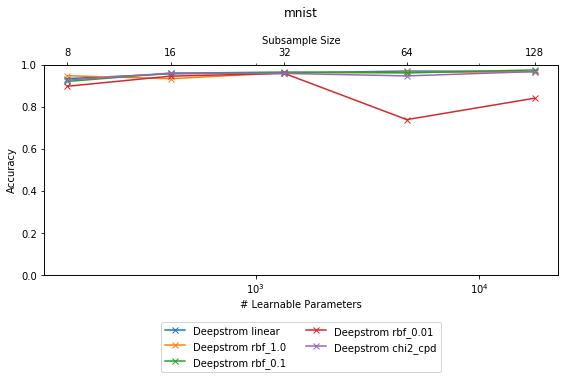

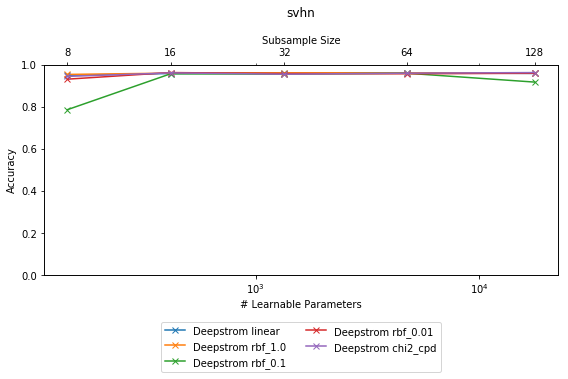

In [23]:
for DATANAME in datasets:
    df_data = df[df["dataset"] == DATANAME]
    nb_classes_dataset = nb_classes_datasets[DATANAME]
    nb_feature_conv = nb_feature_convs[DATANAME]
    f, ax = plt.subplots()
    for k_name in kernel_names:
        df_kernel = df_data[df_data["kernel"] == k_name]
        if k_name == "rbf":
            for g_val in gamma_values:
                k_name = "rbf" + "_" + str(g_val)
                df_rbf = df_kernel[df_kernel["--gamma"] == g_val]
                accuracies_kernel = df_rbf["test_acc"]
                subsample_sizes_kernel = df_rbf["--nys-size"].astype(int)
                np_param = (np.square(subsample_sizes_kernel) +  # m x m
                            subsample_sizes_kernel * nb_classes_dataset)  # m x c
                sorted_idx = np.argsort(np_param.values)
                xx = np_param.values[sorted_idx]
                print(accuracies_kernel.values[sorted_idx])
                yy = accuracies_kernel.values[sorted_idx].astype(float)
                ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")
        else:
            accuracies_kernel = df_kernel["test_acc"]
            subsample_sizes_kernel = df_kernel["--nys-size"].astype(int)
            np_param = (np.square(subsample_sizes_kernel) +  # m x m
                        subsample_sizes_kernel * nb_classes_dataset)  # m x c
            sorted_idx = np.argsort(np_param.values)
            xx = np_param.values[sorted_idx]
            print(accuracies_kernel.values[sorted_idx])
            yy = accuracies_kernel.values[sorted_idx].astype(float)
            ax.plot(xx, yy, marker="x", label=f"Deepstrom {k_name}")


    post_processing_figures(f, ax, np_param, subsample_sizes_kernel)